In [1]:
from numpy.random import randint 
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# data parameters
n_arrays = 20_000
array_length = 10
max_value = 10
min_max_value = max_value // 2

# model parameters
modelPath = ""
modelName = "PMatrix.keras"
epochs = 300
batch_size = 64
neurons = 512
stop_perc = 5

## Dataset

In [20]:
# generate dataset
def find_permutationMatrix(input_array, sorted_array):
    temp_input_array = input_array.tolist()
    # run trought the sorted array 
    #   for every element search the corresponding index of the input array
    perm_matrix = []
    for i in range(len(sorted_array)):
        el_index = np.where(temp_input_array == sorted_array[i])[0][0]
        # mark the element as already seen 
        temp_input_array[el_index] = -1
        # append to perm matrix
        perm_matrix.append(el_index)
    return np.array(perm_matrix) 

inputs = []
inputs_sorted = []
labels = []
for _ in range(n_arrays):
    input_array = randint(0, randint(min_max_value, max_value), array_length)
    sorted_array = np.sort(input_array)
    perm_matrix = find_permutationMatrix(input_array, sorted_array)

    inputs.append(input_array)
    inputs_sorted.append(sorted_array)
    labels.append(perm_matrix)

print(inputs[:3])
print(inputs_sorted[:3])
print(labels[:3])
print()
print(len(inputs), len(labels))

[array([8, 6, 0, 5, 2, 7, 7, 4, 2, 3]), array([5, 5, 1, 0, 2, 0, 2, 1, 6, 0]), array([7, 3, 2, 2, 4, 6, 1, 7, 7, 1])]
[array([0, 2, 2, 3, 4, 5, 6, 7, 7, 8]), array([0, 0, 0, 1, 1, 2, 2, 5, 5, 6]), array([1, 1, 2, 2, 3, 4, 6, 7, 7, 7])]
[array([2, 4, 8, 9, 7, 3, 1, 5, 6, 0]), array([3, 5, 9, 2, 7, 4, 6, 0, 1, 8]), array([6, 9, 2, 3, 1, 4, 5, 0, 7, 8])]

20000 20000


In [4]:
# normalize 
for i in range(len(inputs)):
    inputs[i] = inputs[i].astype("float32") / (max_value - 1)
    # goes from 0 to max array length 
    labels[i] = labels[i].astype("float32") / (array_length - 1)

In [5]:
# make np array 
inputs = np.array(inputs)
labels = np.array(labels)

In [6]:
print(inputs[:3])
print(labels[:3])
print()
print(len(inputs), len(labels))

[[0.33333334 0.11111111 0.22222222 0.         0.44444445 0.22222222
  0.22222222 0.11111111 0.33333334 0.22222222]
 [0.7777778  0.8888889  0.22222222 0.22222222 0.5555556  0.
  0.6666667  0.7777778  0.8888889  0.5555556 ]
 [0.44444445 0.5555556  0.33333334 0.33333334 0.11111111 0.22222222
  0.5555556  0.22222222 0.7777778  0.33333334]]
[[0.33333334 0.11111111 0.7777778  0.22222222 0.5555556  0.6666667
  1.         0.         0.8888889  0.44444445]
 [0.5555556  0.22222222 0.33333334 0.44444445 1.         0.6666667
  0.         0.7777778  0.11111111 0.8888889 ]
 [0.44444445 0.5555556  0.7777778  0.22222222 0.33333334 1.
  0.         0.11111111 0.6666667  0.8888889 ]]

20000 20000


In [7]:
# split data 
n_train = int(0.5 * n_arrays)
n_val = int(0.25 * n_arrays)
n_eval = n_arrays - n_train - n_val

input_train = inputs[:n_train]
input_validation = inputs[n_train:(n_train+n_val)]
input_evaluation = inputs[n_train + n_val:]

label_train = labels[:n_train]
label_validation = labels[n_train:(n_train+n_val)]
label_evaluation = labels[n_train + n_val:]

In [8]:
print(input_train.shape, input_validation.shape, input_evaluation.shape)
print(label_train.shape, label_validation.shape, label_evaluation.shape)

(10000, 10) (5000, 10) (5000, 10)
(10000, 10) (5000, 10) (5000, 10)


## Model

In [9]:
inputs = keras.Input(shape=(array_length))
x = layers.Dense(neurons, activation="relu") (inputs)
x = layers.Dense(neurons, activation="relu") (x)
x = layers.Dense(neurons, activation="relu") (x)
x = layers.Dense(neurons, activation="relu") (x)
outputs = layers.Dense(array_length, activation="sigmoid") (x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 798,730
Trainable params: 798,730
Non-trainable

In [10]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["mae"]
    )

In [11]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
        filepath=modelPath + modelName, 
        monitor="val_mae", 
        save_best_only=True),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=int(epochs/100*stop_perc))
    ]   

In [12]:
history = model.fit(
    input_train, 
    label_train, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_data=(input_validation, label_validation),
    callbacks=callbacks
    )

Epoch 1/300
157/157 [==============================] - 7s 23ms/step - loss: 0.6580 - mae: 0.2465 - val_loss: 0.6452 - val_mae: 0.2361
Epoch 2/300
157/157 [==============================] - 3s 22ms/step - loss: 0.6373 - mae: 0.2292 - val_loss: 0.6312 - val_mae: 0.2235
Epoch 3/300
157/157 [==============================] - 3s 18ms/step - loss: 0.6248 - mae: 0.2184 - val_loss: 0.6258 - val_mae: 0.2166
Epoch 4/300
157/157 [==============================] - 4s 22ms/step - loss: 0.6149 - mae: 0.2096 - val_loss: 0.6198 - val_mae: 0.2126
Epoch 5/300
157/157 [==============================] - 4s 23ms/step - loss: 0.6062 - mae: 0.2015 - val_loss: 0.6205 - val_mae: 0.2110
Epoch 6/300
157/157 [==============================] - 4s 25ms/step - loss: 0.5979 - mae: 0.1936 - val_loss: 0.6056 - val_mae: 0.1985
Epoch 7/300
157/157 [==============================] - 4s 24ms/step - loss: 0.5908 - mae: 0.1870 - val_loss: 0.6014 - val_mae: 0.1923
Epoch 8/300
157/157 [==============================] - 3s 21ms

## Performance

In [13]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_epochs = range(1, len(val_mae) + 1)

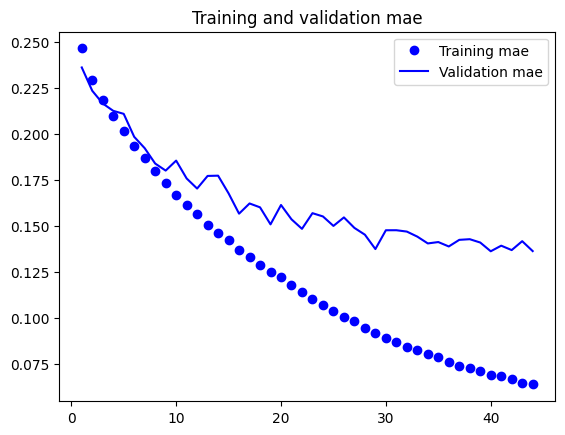

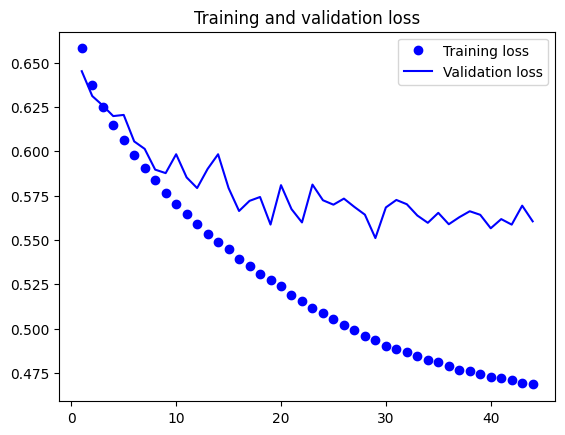

In [14]:
plt.plot(x_epochs, mae, "bo", label="Training mae")
plt.plot(x_epochs, val_mae, "b", label="Validation mae")
plt.title("Training and validation mae")
plt.legend()
plt.figure()
plt.plot(x_epochs, loss, "bo", label="Training loss")
plt.plot(x_epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:
model_best = keras.models.load_model(modelPath + modelName)

eval_loss, eval_mae = model_best.evaluate(input_evaluation, label_evaluation)
# denormalize 
denorm_eval_mae = eval_mae * (array_length - 1)
# percentage
denorm_eval_mae_perc = denorm_eval_mae * 100 / (array_length - 1)

print(f"Evaluation denormalized mae: {denorm_eval_mae:.3f}")
print(f"Evaluation denormalized mae percentage: {denorm_eval_mae_perc:.2f}%")

157/157 [==============================] - 2s 8ms/step - loss: 0.5566 - mae: 0.1367
Evaluation denormalized mae: 1.230
Evaluation denormalized mae percentage: 13.67%


## Predictions

In [16]:
def denormalize_input_el(x):
    x = x * (max_value - 1)
    return x

def denormalize_matrix_el(m):
    m = m * (array_length - 1)
    return m

def rounding_el(x):
    x = round(x, 0)
    return x

def apply_permutationMatrix(i_array, p_matrix):
    s_array = []
    for i in range(len(p_matrix)):
        s_array.append(i_array[int(p_matrix[i])])
    return s_array

In [17]:
predictions_matrix = model_best.predict(input_evaluation)
targets_matrix = label_evaluation

print(predictions_matrix[:3])
print(targets_matrix[:3])

157/157 [==============================] - 2s 7ms/step
[[0.258639   0.6842896  0.9830187  0.06727629 0.05530669 0.32027212
  0.2713467  0.5736806  0.5557192  0.99962807]
 [0.07632191 0.19055516 0.40577286 0.5305434  0.651176   0.7169169
  0.55466455 0.98902225 0.00852355 0.8263492 ]
 [0.3442347  0.4111147  0.16979891 0.70663595 0.9194717  0.99414617
  0.03578752 0.03428642 0.30370596 0.61631817]]
[[0.22222222 0.7777778  0.8888889  0.11111111 0.5555556  0.
  0.33333334 0.6666667  0.44444445 1.        ]
 [0.11111111 0.22222222 0.33333334 0.5555556  0.6666667  0.7777778
  0.44444445 1.         0.         0.8888889 ]
 [0.33333334 0.44444445 0.22222222 0.5555556  0.7777778  0.8888889
  1.         0.         0.11111111 0.6666667 ]]


In [18]:
# merge predictions matrix and targets for plot 
merge_pred_mat = []
merge_targ_mat = []
for i in range(len(predictions_matrix)):
    for ii in range(array_length):
        el_p = rounding_el(denormalize_matrix_el(predictions_matrix[i][ii]))
        el_t = rounding_el(denormalize_matrix_el(targets_matrix[i][ii]))
        merge_pred_mat.append(el_p)
        merge_targ_mat.append(el_t)

print(merge_pred_mat[:3*array_length])
print(merge_targ_mat[:3*array_length])

[2.0, 6.0, 9.0, 1.0, 0.0, 3.0, 2.0, 5.0, 5.0, 9.0, 1.0, 2.0, 4.0, 5.0, 6.0, 6.0, 5.0, 9.0, 0.0, 7.0, 3.0, 4.0, 2.0, 6.0, 8.0, 9.0, 0.0, 0.0, 3.0, 6.0]
[2.0, 7.0, 8.0, 1.0, 5.0, 0.0, 3.0, 6.0, 4.0, 9.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 4.0, 9.0, 0.0, 8.0, 3.0, 4.0, 2.0, 5.0, 7.0, 8.0, 9.0, 0.0, 1.0, 6.0]


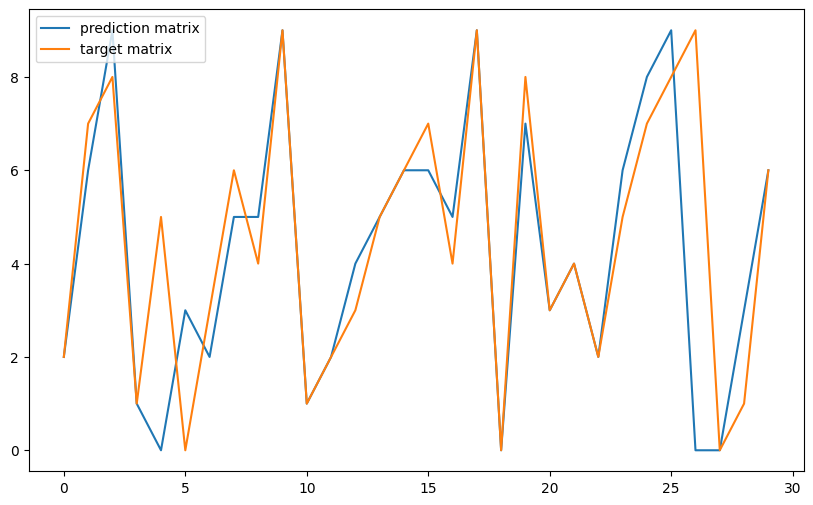

In [22]:
plot_length = array_length * 3
x_merge = list(range(0, plot_length))

plt.figure(figsize=(10, 6))
plt.plot(x_merge[:plot_length], merge_pred_mat[:plot_length], label="prediction matrix")
plt.plot(x_merge[:plot_length], merge_targ_mat[:plot_length], label="target matrix")
plt.legend(loc="upper left")
plt.show()
